In [1]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from qiskit.circuit.library import MCMT, RYGate

# Introduction to Machine Learning

In [2]:
from sklearn.datasets import make_classification

In [26]:
X, y = make_classification(n_samples=6, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, 
                           random_state=1)

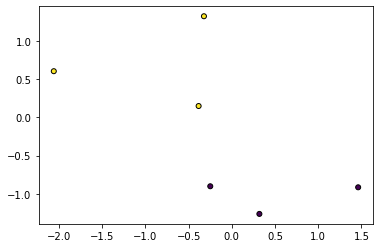

In [4]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")
plt.show()

In [5]:
X[:5]

array([[-0.3224172 ,  1.32058074],
       [-2.06014071,  0.60253058],
       [ 1.46210794, -0.91464165],
       [-0.24937038, -0.90113345],
       [-0.38405435,  0.1474203 ]])

### Data Normalization

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [27]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)
X[:5]

array([[-0.11166581,  1.59864182],
       [-1.77569283,  0.82748013],
       [ 1.597178  , -0.80191175],
       [-0.04171688, -0.7874044 ],
       [-0.17068894,  0.33870702]])

### Data Partitioning

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

### KNN Classifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn_classic = KNeighborsClassifier(n_neighbors=1)
knn_classic.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [11]:
y_pred = knn_classic.predict(X_test)

In [12]:
for i in range(len(y_test)):
    print('idx.', i,'real', y_test[i], 'pred', y_pred[i])

idx. 0 real 0 pred 0
idx. 1 real 1 pred 1


KNN Classifier Explained with distance functions

In [13]:
from scipy.spatial.distance import cdist

In [14]:
D = cdist(X_test, X_train)
D

array([[1.15659344, 2.10389275, 1.63895909, 2.9466599 ],
       [3.03356841, 1.67777729, 2.36949881, 1.83403279]])

In [15]:
closest_instance = np.argmin(D, axis=1)
closest_instance

array([0, 1])

In [16]:
y_pred = y_train[closest_instance]
y_pred

array([0, 1])

# Quantum KNN

Util functions to normalize

In [17]:
def normalize_(x):
    norm = np.linalg.norm(x)
    if norm == 0:
        return x
    return x / norm


def normalize(X):
    # if len(X.shape) == 1:
    #     return normalize_(X)
    X_ = np.zeros(X.shape)
    for i in range(len(X)):
        X_[i] = normalize_(X[i])
    return X_

In [28]:
X = normalize(X)
X[:5]

array([[-0.06968064,  0.99756935],
       [-0.90641315,  0.42239224],
       [ 0.89368227, -0.44870034],
       [-0.05290605, -0.99859949],
       [-0.45002811,  0.89301439]])

In [29]:
X[0,0]**2 + X[0,1]**2

1.0

In [30]:
X[5,0]**2 + X[5,1]**2

0.9999999999999999

In [34]:
import matplotlib.pyplot as plt

def draw_axes():
    points = [ [1.2,0], [0,1.2], [-1.2,0], [0,-1.2] ] # dummy points for zooming out
    arrows = [ [1.1,0], [0,1.1], [-1.1,0], [0,-1.1] ] # coordinates for the axes
    for p in points: 
        plt.plot(p[0],p[1]+0.1) # drawing dummy points
    for a in arrows: 
        plt.arrow(0,0,a[0],a[1],head_width=0.04, head_length=0.08) # drawing the axes

def draw_unit_circle():
    unit_circle= plt.Circle((0,0),1,color='black',fill=False)
    plt.gca().add_patch(unit_circle) 

def draw_quantum_state(x,y,name,color="blue"):
    # shorten the line length to 0.92
    # line_length + head_length should be 1
    x1 = 0.92 * x
    y1 = 0.92 * y
    plt.arrow(0,0,x1,y1,head_width=0.04,head_length=0.08,color=color)
    x2 = 1.15 * x
    y2 = 1.15 * y
    plt.text(x2,y2,name)

def draw_qubit():
    # draw a figure
    plt.figure(figsize=(6,6), dpi=60)
    # draw the origin
    plt.plot(0,0,'ro') # a point in red color
    # drawing the axes by using one of our predefined function
    draw_axes()
    # drawing the unit circle by using one of our predefined function
    draw_unit_circle()
    # drawing |0>
    plt.plot(1,0,"o")
    plt.text(1.05,0.05,"|0>")
    # drawing |1>
    plt.plot(0,1,"o")
    plt.text(0.05,1.05,"|1>")
    # drawing -|0>
    plt.plot(-1,0,"o")
    plt.text(-1.2,-0.1,"-|0>")
    # drawing -|1>
    plt.plot(0,-1,"o")
    plt.text(-0.2,-1.1,"-|1>")

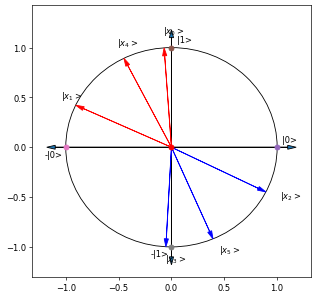

In [37]:
draw_qubit()
for i in range(len(X)):
    color = 'blue' if y[i] == 0 else 'red'
    draw_quantum_state(X[i,0], X[i,1],r"$|x_%s>$" % i,color)

Data passed to a circuit must respect unit circle equations 

In [38]:
X = np.arcsin(X)
X[:5]

array([[-0.06973715,  1.50105917],
       [-1.13471339,  0.43608294],
       [ 1.10548579, -0.46531053],
       [-0.05293076, -1.51786556],
       [-0.46679682,  1.10399951]])

Transformed Data Partitioning

In [484]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [485]:
y_train

array([0, 1, 0, 1])

In [486]:
len(X_train), len(X_test), np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

(4, 2, (array([0, 1]), array([2, 2])), (array([0, 1]), array([1, 1])))

Single test

In [50]:
idx_test = 1
print(X_test[idx_test], y_test[idx_test])

[-1.77569283  0.82748013] 1


## Quantum Circuit Preparation

Count the number of necessary bits

In [39]:
N = X_train.shape[1] # Number of features
M = X_train.shape[0] # Number of training inputs
n_classes = len(np.unique(y_train)) # Assuming that training contains all type of classes 
n_feature_indexes = int(math.ceil(math.log2(N))) # Needed qubit to represent all the feature of a given element (reg |i>)
n_training_indexes = int(math.ceil((math.log2(M)))) # Needed qubit to represent all training inputs (reg |m>)
n_class_indexes = int(math.ceil(math.log2(n_classes))) # Needed qubit to represent all the classes (reg |c>)

In [40]:
print('N', N)
print('M', M)
print('n_classes', n_classes)
print('n_feature_indexes', n_feature_indexes)
print('n_training_indexes', n_training_indexes)
print('n_class_indexes', n_class_indexes)

N 2
M 4
n_classes 2
n_feature_indexes 1
n_training_indexes 2
n_class_indexes 1


Circuit construction

In [41]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer, Aer
from qiskit.extensions import Initialize, UnitaryGate

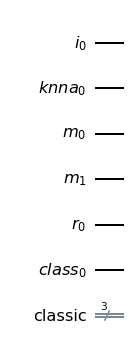

In [45]:
r = QuantumRegister(1, 'r') # Rotation Register for QRAM (all dataset values are stored here)
i = QuantumRegister(n_feature_indexes, 'i') # Feature index

# Qubits dealing classification
knn_a = QuantumRegister(1, 'knna') #Ancilla for KNN.
m = QuantumRegister(n_training_indexes, 'm') #Training index
c = QuantumRegister(n_class_indexes, 'class') #Class for KNN

classical = ClassicalRegister(1 + 1 + n_class_indexes, 'classic') # r(1) + knna(1) + n_class_indexes

circuit = QuantumCircuit(i, knn_a, m, r, c, classical)

circuit.draw(output='mpl')

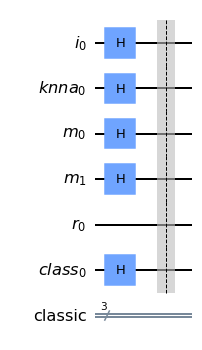

In [46]:
# Step A - Entangle States
#-_> Superpose

circuit.h(knn_a)
circuit.h(m)
circuit.h(c)
circuit.h(i)
circuit.barrier()

circuit.draw(output='mpl')

Util functions to store data vectors (_amplitude_mapper) and to change indexing (_registers_switcher)

https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.mcry.html

In [47]:
def _registers_switcher(circuit, value, qubit_index):
    bin_str_pattern = '{:0%sb}' % len(qubit_index)
    value = bin_str_pattern.format(value)[::-1] #Reversing string: In this way i_0 is the less significant bit.
    for idx, bit in enumerate(value):
        if not int(bit):
            circuit.x(qubit_index[idx])

def _amplitude_mapper(circuit, vector, feature_qubits, control_qubits, target):
    for idx in range(len(vector)):
        _registers_switcher(circuit, idx, feature_qubits) #Switch feature
        circuit.barrier()

        circuit.append(MCMT(RYGate(vector[idx]), num_ctrl_qubits=len(control_qubits), num_target_qubits = 1), 
                       control_qubits[0:]+[target])  # data is stored with this operator (set of CNOT gates)

        circuit.barrier()
        #circuit.mcry(vector[idx], control_qubits, target, None) #mode="noancilla"
        _registers_switcher(circuit, idx, feature_qubits) #Undo switc feature

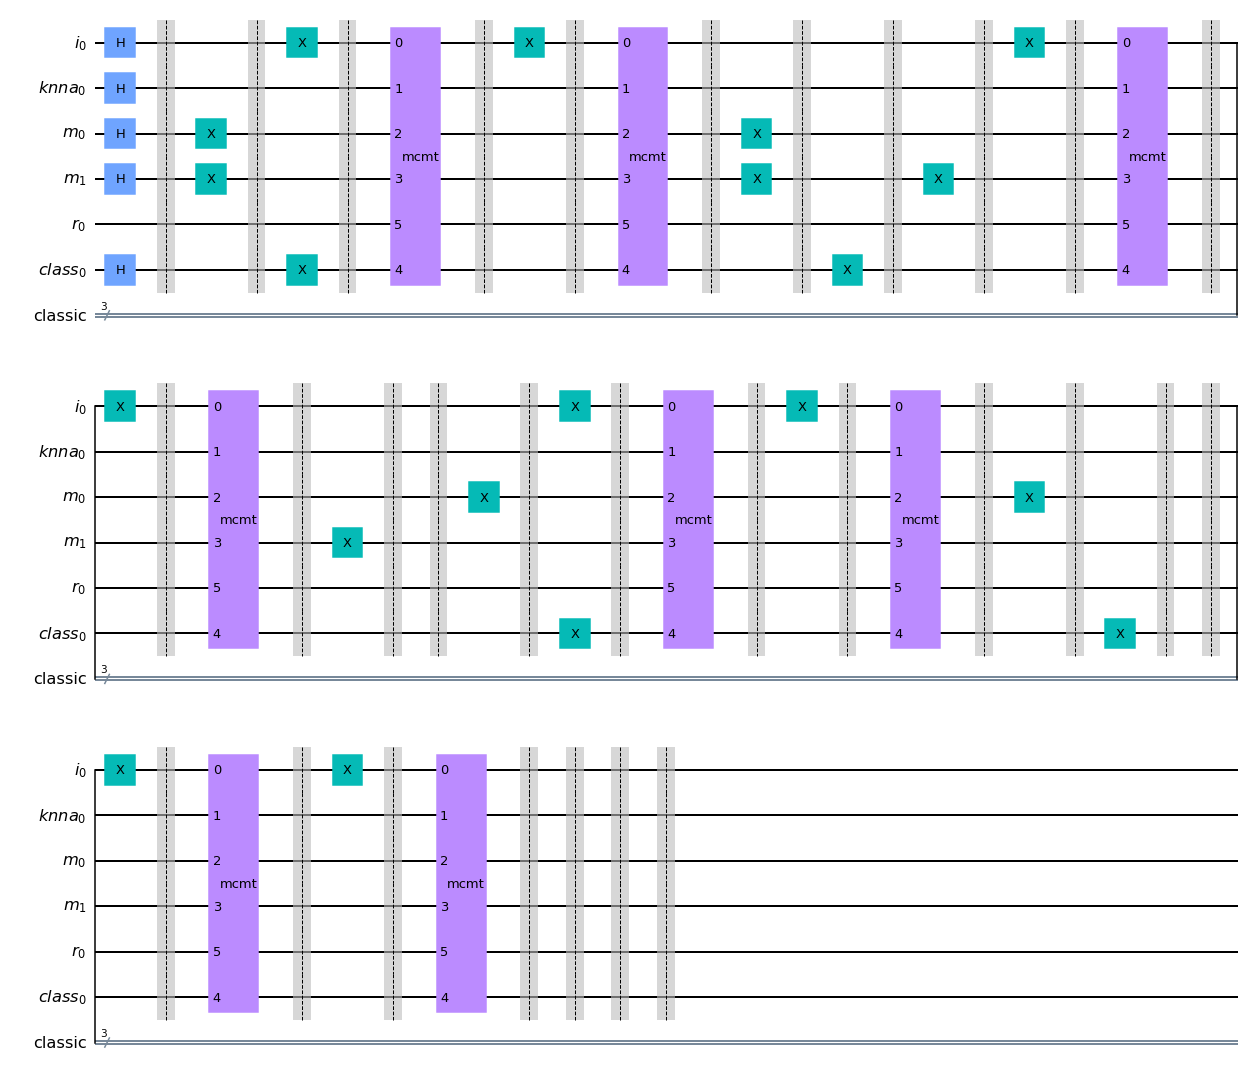

In [48]:
# Steps C, D - Encode Training Instances
for idx, x_i, y_i in zip(range(len(X_train)), X_train, y_train):
    
    _registers_switcher(circuit, idx, m) #Switch index
    
    circuit.barrier()

    _registers_switcher(circuit, y_i, c) #Switch class

    _amplitude_mapper(circuit, x_i, i, i[0:]+knn_a[0:]+m[0:]+c[0:], r[0])

    _registers_switcher(circuit, idx, m) #Undo switch index
    
    circuit.barrier()

    _registers_switcher(circuit, y_i, c) #Undo switch class
    
    circuit.barrier()

circuit.barrier()
circuit.draw(output='mpl')

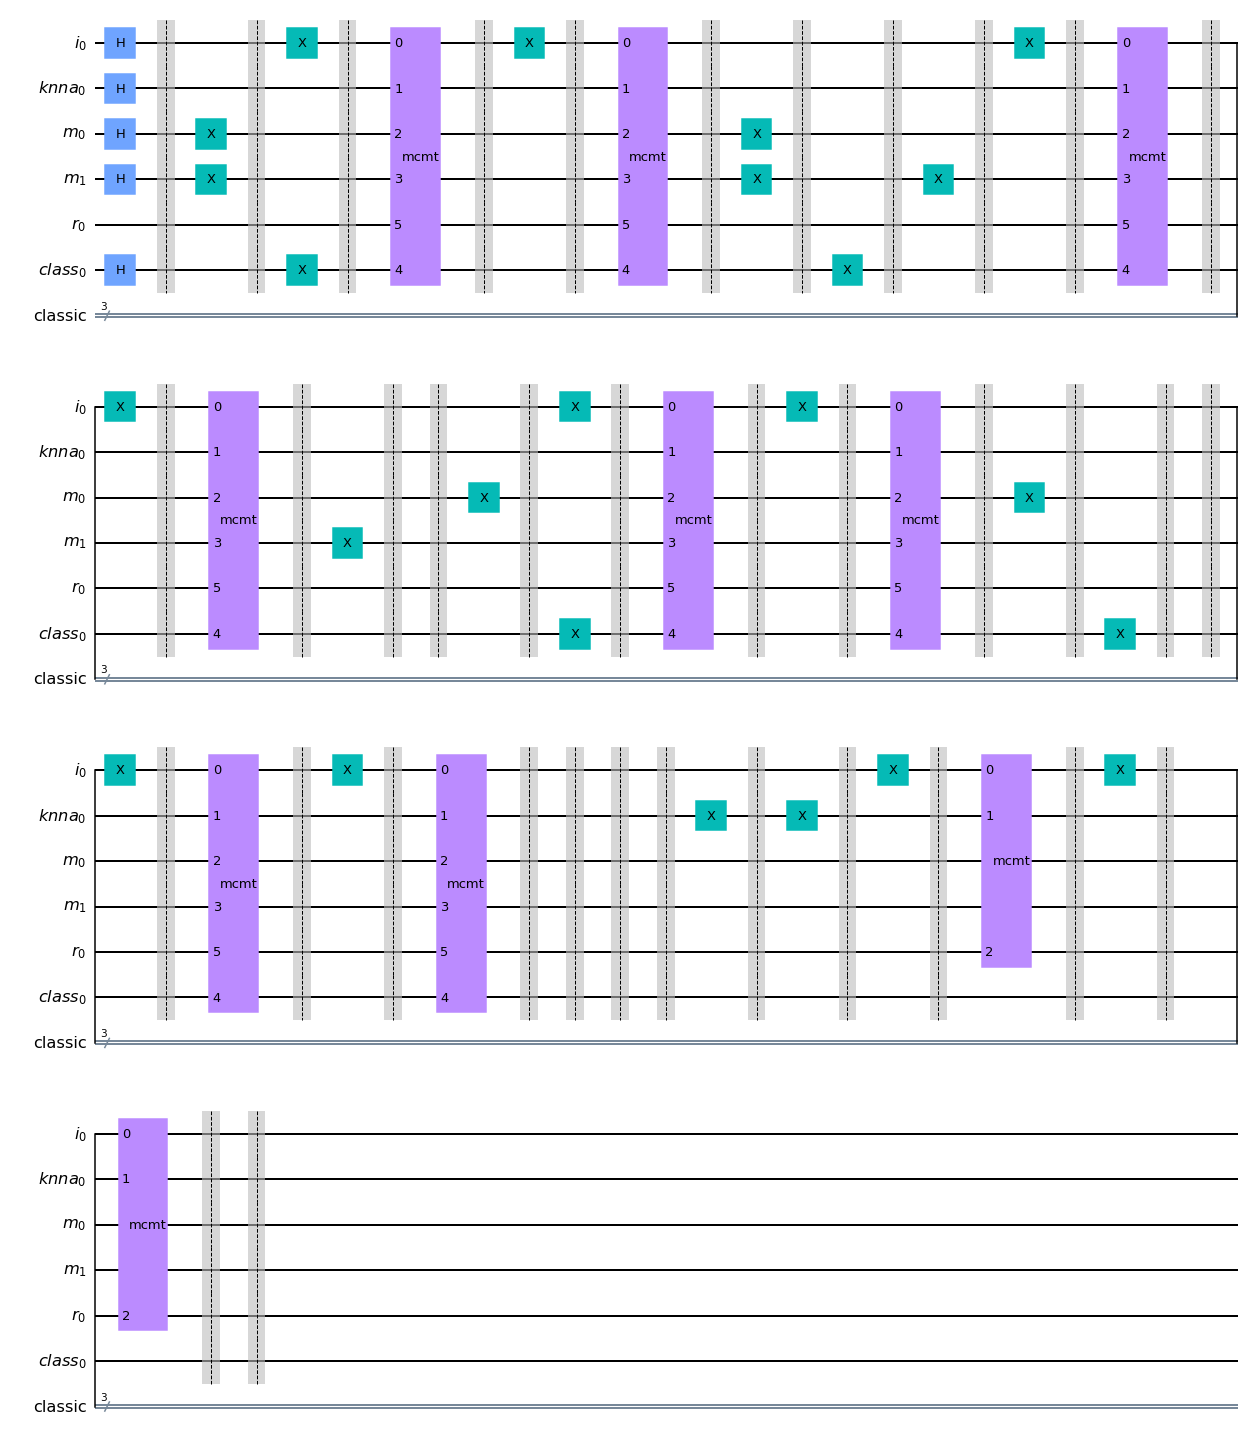

In [51]:
# Step B - Encode Test Instance

# Switching to test
circuit.x(knn_a)
circuit.barrier()

_amplitude_mapper(circuit, X_test[idx_test], i, i[0:]+knn_a[0:], r[0])
circuit.barrier()

circuit.draw(output='mpl')

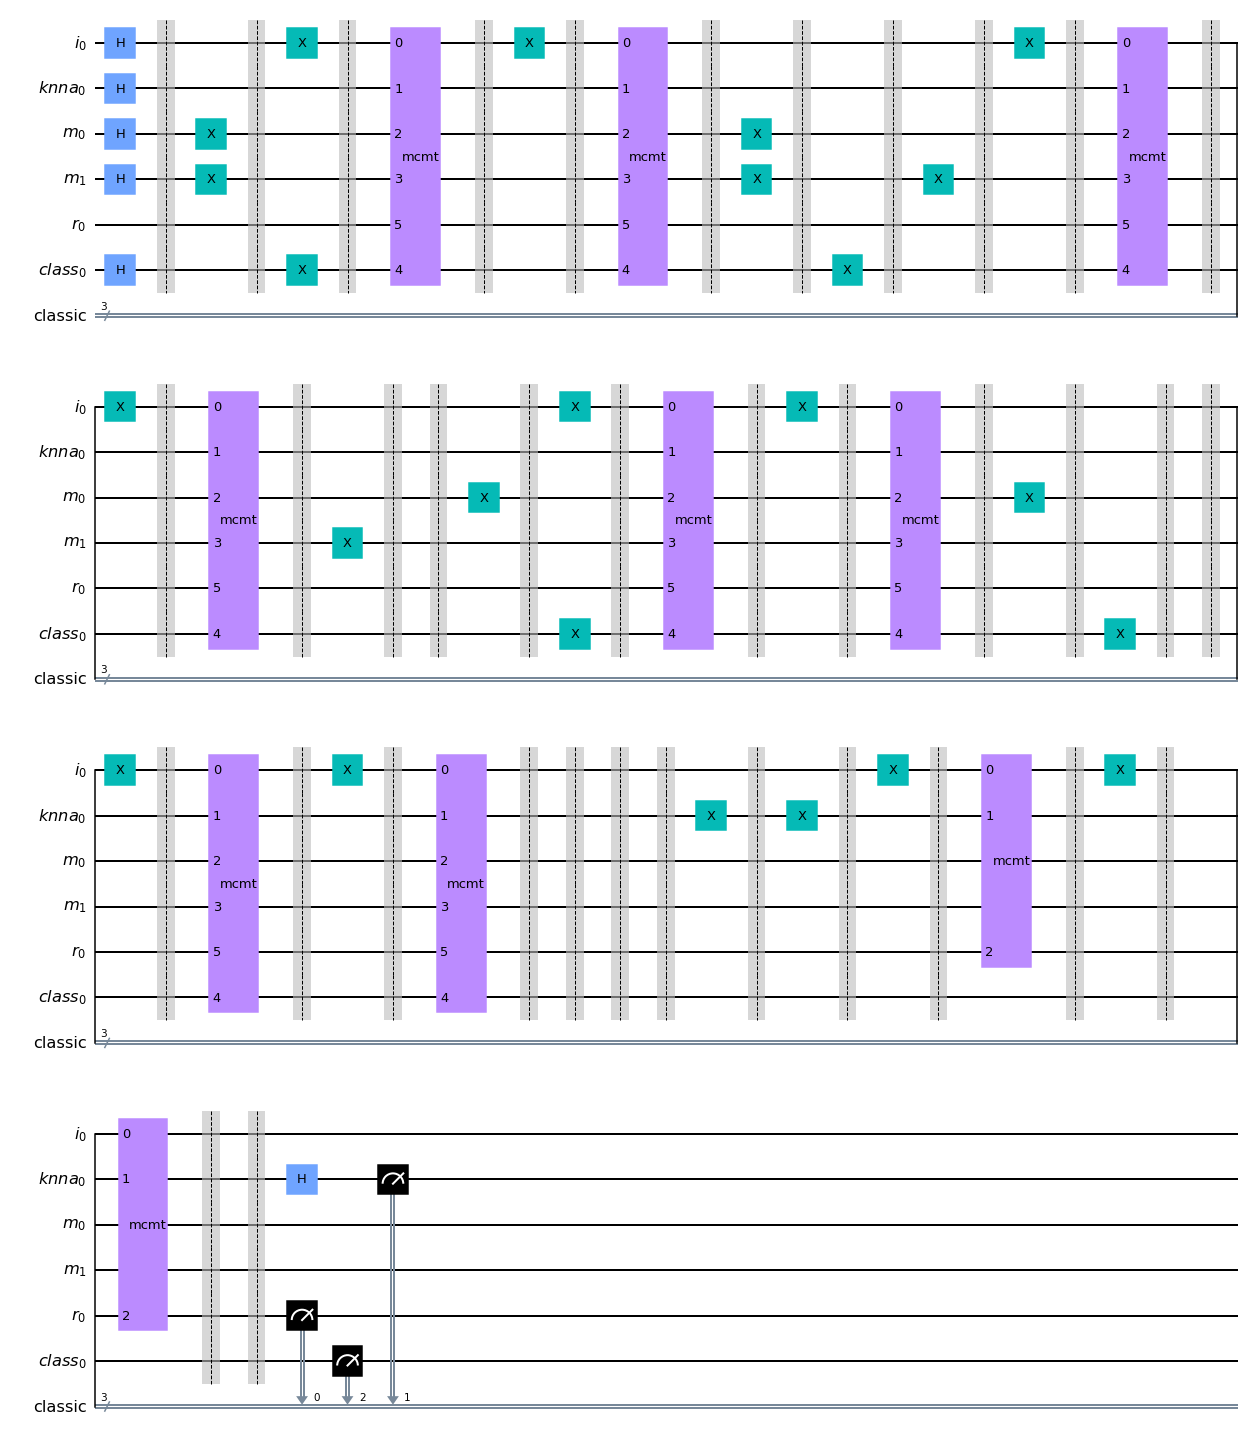

In [52]:
# Measurements and Distance Calculation

# Step E
circuit.measure(r[0], classical[0])

# Step F
circuit.h(knn_a) # Classify here

#The ordering of these operations does nto impact the result
circuit.measure(knn_a, classical[1])

for class_bit_index in range(len(c)):
    circuit.measure(c[class_bit_index], classical[class_bit_index+2])
    
circuit.draw(output='mpl')

In [53]:
#Run Simulator
n_shots = 1024
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=n_shots)
result = job.result()
counts = result.get_counts(circuit)

#la r is the lefmost bit, knn_a the central one, c the rightmost
#r controls the QRAM correctness
#knn_a controls the distance calculation correctness
#c contains the result

In [54]:
counts

{'110': 17,
 '100': 343,
 '001': 45,
 '101': 82,
 '111': 67,
 '011': 40,
 '010': 6,
 '000': 424}

In [55]:
def _clear_counts(counts):
    classes_votes = {}
    for key, value in counts.items():
        if key[-2:] == '01':  #Only r = 1 and knna = 0
            class_votes = key[:-2] #excluding the "fixed bit" 01 (r, knna)
            classes_votes[int(class_votes[::-1],2)] = value
    return classes_votes

In [56]:
cleared_counts = _clear_counts(counts)

In [57]:
cleared_counts

{0: 45, 1: 82}

In [58]:
from qiskit.tools.visualization import plot_histogram

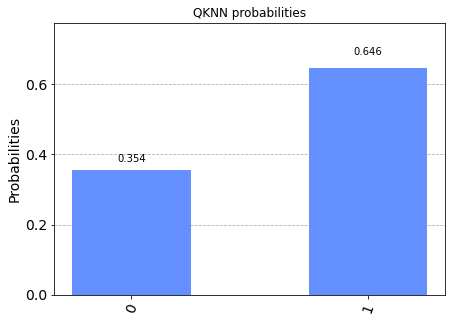

In [59]:
plot_histogram(cleared_counts, title='QKNN probabilities')

In [60]:
y_test_val = y_test[idx_test]

In [61]:
y_pred_val = max(cleared_counts, key=cleared_counts.get)

In [62]:
print('idx.', idx_test, 'real', y_test_val, 'pred', y_pred_val)

idx. 1 real 1 pred 1
